# Testing out just rollouts of large numbers of trajectories!

In [1]:

from utilities import rollout
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

In [78]:


# Must use the same configuration as the one you trained the model in to evalaute it
config = {
    "observation": {
        "type": "Kinematics",  # Ensures observation matches training
        "features": ["x", "y", "vx", "vy"],  # Feature set used in training
    },
    "action": {
        "type": "DiscreteMetaAction",
    },
    "lanes_count": 1,  # Number of lanes in the roundabout
    "vehicles_count": 1,  # Total number of vehicles
    "duration": 100,  # Simulation steps
    "collision_reward": -1.0,  # Penalty for collision
    "reward_speed_range": [20, 30],  # Preferred speed range
}



scenario = "roundabout-v0" 
render_mode = "rgb_array"

# Setting up the environment
env = gym.make(scenario, render_mode=render_mode, config = config)
env.unwrapped.configure(config)
# env.config['lanes_count'] = 1
env.reset()
# Load the trained model
model = DQN.load("dqn_highway_roundabout")

trajectories = []

for i in range(1000):
    trajectories.append(rollout(model,env,plot = False))


/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/Agentic-Safety-Validation/.venv/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/Agentic-Safety-Validation/.venv/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


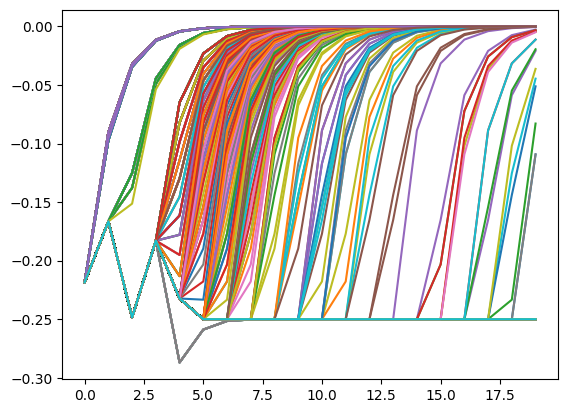

In [83]:
# for i in trajectories[0]:
    # print("observation ",i[0][0])
    # print("action ",i[1])
    # print("reward ",i[2])

import matplotlib.pyplot as plt
# [[ 0.01861403  1.          0.05092392 -0.21851133]
# [[ 0.01861403  1.          0.05092392 -0.21851133]
x = 0

for i in range(len(trajectories)):
    car_1_x = []
    car_1_y = []
    car_1_x_vel = []
    car_1_y_vel  = []
    for trajectory in trajectories[i]:
        for observation in trajectory[0:1]:
            for car in observation[0:1]:
                car_1_x.append(car[0])
                car_1_y.append(car[1])
                car_1_x_vel.append(car[2])
                car_1_y_vel.append(car[3])

    # plt.plot(car_1_x,car_1_y, label = "trial"+str(i))
    t = []
    for j in range(len(car_1_x)):
        t.append(j)

    plt.plot(t,car_1_y_vel, label = "trial"+str(i))


# plt.legend()



## GOALS:

Going into the weekend
- proposal trajectory distribution / nominal trajectory (how do we build this out? for something like this?)
    - how do you do this for a 2d problem
    - how to tell from this probability distribution how it would be sampled from that trajectory
- how do we make it more granular for info?
